# Load & Explore the data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.columns = ['gender', 'race', 'parent_education', 'lunch', 'test_prep', 
              'math_score', 'reading_score', 'writing_score']

# Basic Analysis 

In [7]:
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


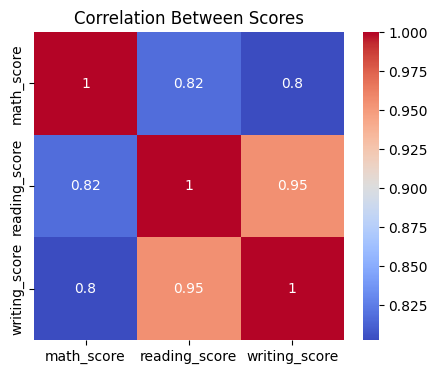

In [8]:
# Correlation between scores
plt.figure(figsize=(5,4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Scores")
plt.show()

# Visualize Key Patterns

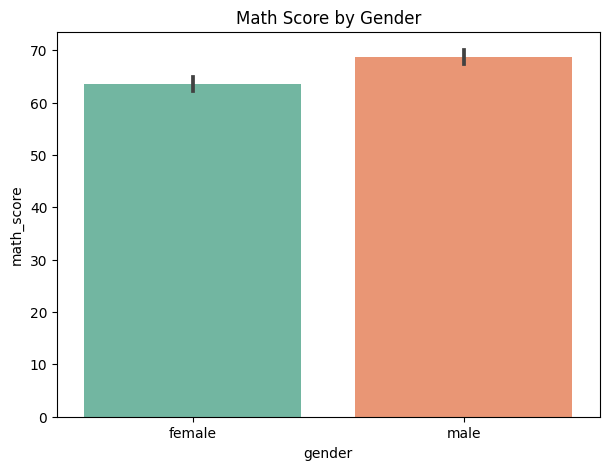

In [9]:
plt.figure(figsize=(7,5))
sns.barplot(x='gender', y='math_score', data=df, palette='Set2')
plt.title("Math Score by Gender")
plt.show()

# Lunch Type Effect 

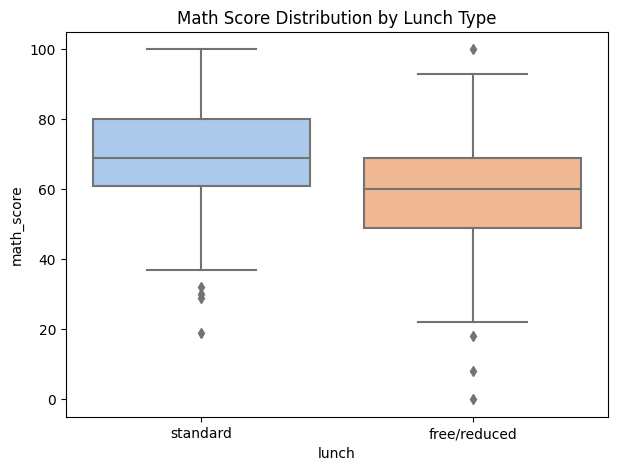

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x='lunch', y='math_score', data=df, palette='pastel')
plt.title("Math Score Distribution by Lunch Type")
plt.show()

# Test Preparation Impact 

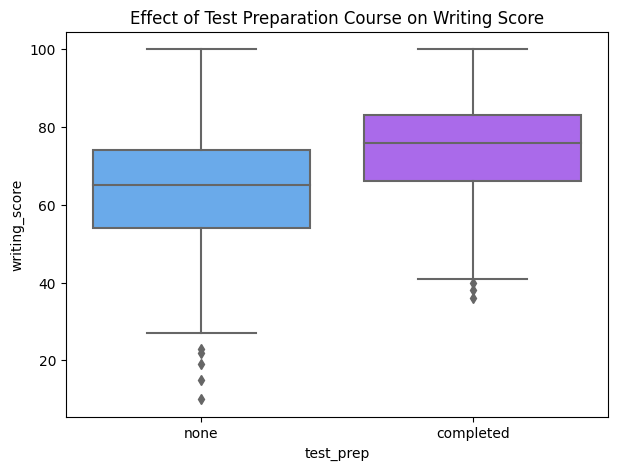

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='test_prep', y='writing_score', data=df, palette='cool')
plt.title("Effect of Test Preparation Course on Writing Score")
plt.show()

# Average Total Score Column 

In [12]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Top 5 high achievers
df.sort_values('average_score', ascending=False).head()

,gender,race,parent_education,lunch,test_prep,math_score,reading_score,writing_score,average_score
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
458,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
962,female,group E,associate's degree,standard,none,100,100,100,100.000000
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
179,female,group D,some high school,standard,completed,97,100,100,99.000000


# Visualize Average Scores 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


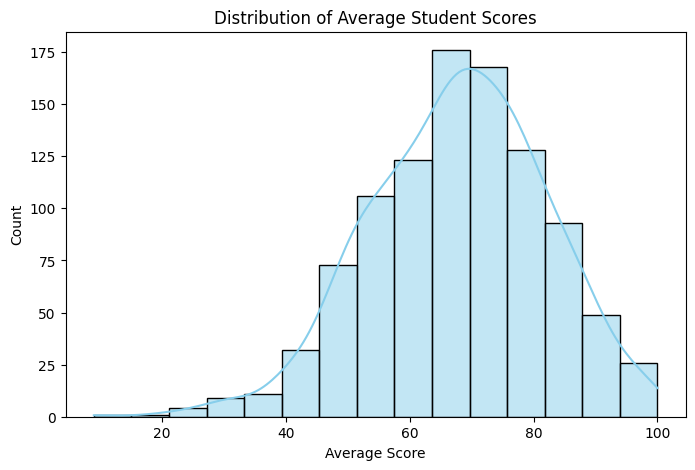

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Average Student Scores")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()

# Categorical Feature Comparison 

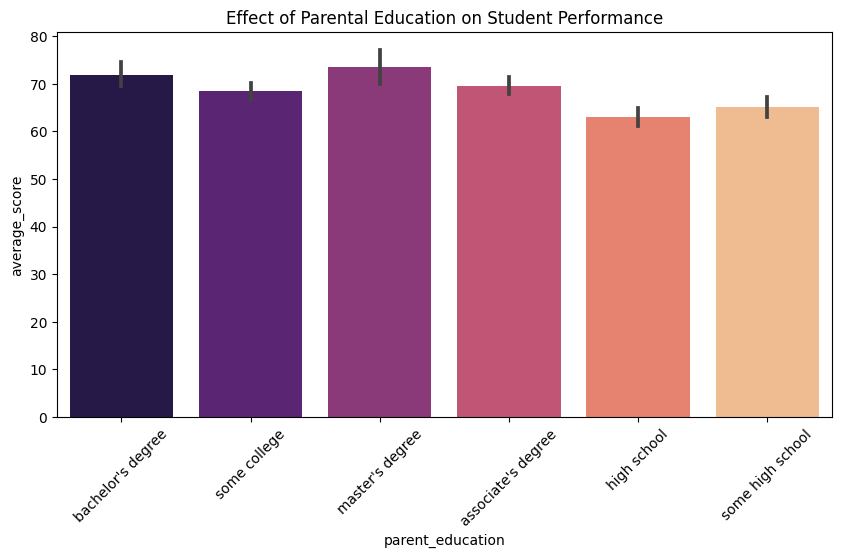

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='parent_education', y='average_score', data=df, palette='magma')
plt.title("Effect of Parental Education on Student Performance")
plt.xticks(rotation=45)
plt.show()

# Simple ML Prediction 

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Label encode categorical data
le = LabelEncoder()
for col in ['gender','race','parent_education','lunch','test_prep']:
    df[col] = le.fit_transform(df[col])

# Create label (High if avg >=70 else Low)
df['Performance'] = np.where(df['average_score'] >= 70, 1, 0)

X = df[['gender','race','parent_education','lunch','test_prep']]
y = df['Performance']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.67      0.66       169
           1       0.55      0.50      0.52       131

    accuracy                           0.60       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.60      0.60      0.60       300



# Feature Importance 

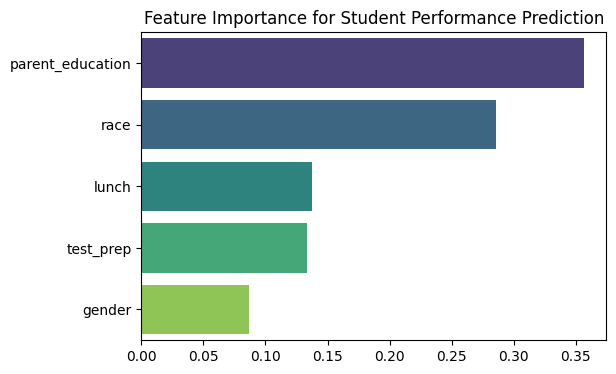

In [16]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("Feature Importance for Student Performance Prediction")
plt.show()

# Summary & Insights 

**Insights & Observations**

1. Students who completed test preparation courses scored significantly higher.
2. Females performed slightly better in reading and writing; males scored higher in math.
3. Parental education has a strong positive correlation with student performance.
4. Standard lunch students scored better than those with free/reduced lunch.

**💡 Recommendations**


1. Schools should encourage test preparation programs.
2. Extra support for students with less-educated parents can bridge performance gaps.
3. Balanced focus on reading and writing for all genders can enhance total scores.